In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , r2_score ,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv(r"C:\Users\PC\Downloads\kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df = df.drop('id',axis = 1)

In [7]:
df = df.drop('date',axis = 1)

In [8]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [42]:
df["bathrooms"].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [11]:
df["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [12]:
df["view"].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [13]:
df = df.drop(["waterfront","view","zipcode","yr_renovated"],axis =1 )

In [14]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

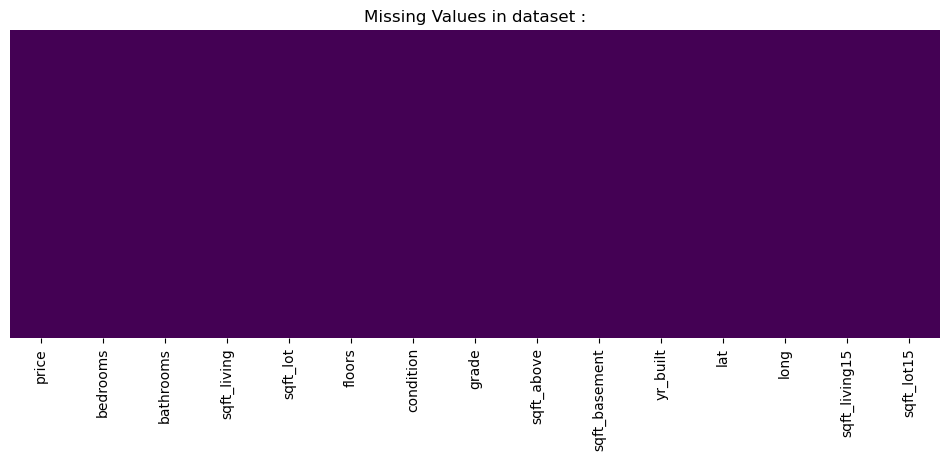

In [15]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing Values in dataset :');

<Axes: >

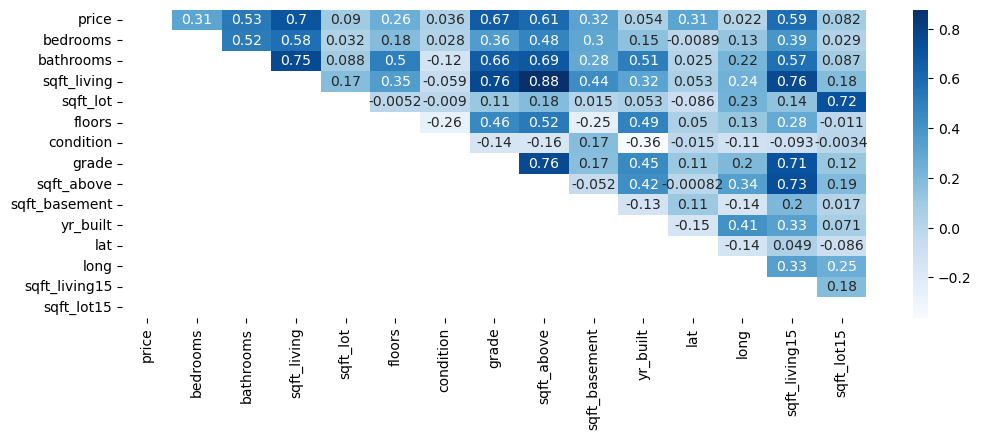

In [27]:
correlation = df.corr()
mask = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(bool))
plt.figure(figsize=(12, 4))
sns.heatmap(mask, cmap='Blues', annot=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_6812\2415499150.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],bins=50,color='r',ax=ax)
C:\Users\PC\AppData\Local\Temp\ipykernel_6812\2415499150.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['price']),bins=50,color='r',a

Text(0.5, 1.0, 'Distribution of insurance charges in log prices')

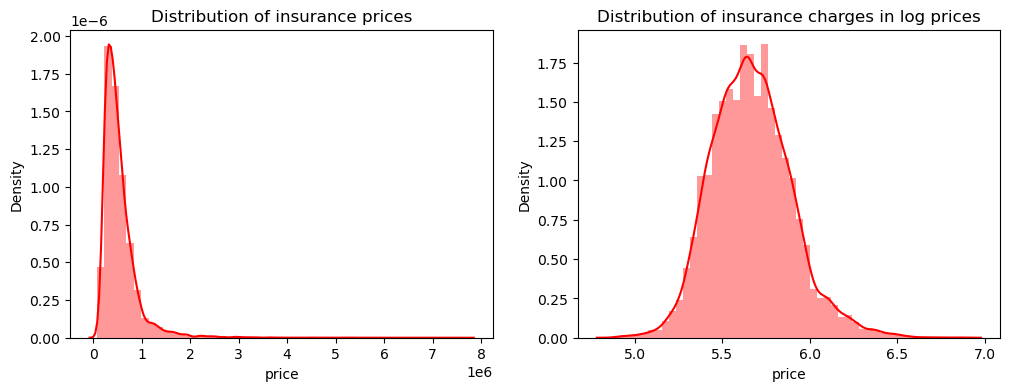

In [32]:
a = plt.figure(figsize=(12,4))

ax = a.add_subplot(121)
sns.distplot(df['price'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance prices')


ax = a.add_subplot(122)
sns.distplot(np.log10(df['price']),bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges in log prices')

In [43]:
#floors , condition ,grade , bedroooms , bathrooms

In [45]:
categorical_columns = ['floors' , 'condition' ,'grade' , 'bedrooms' , 'bathrooms']
df_encode = pd.get_dummies(data = df,prefix = 'OHE' , prefix_sep='_',
columns = categorical_columns,
drop_first = True,
dtype = 'int8')

In [46]:
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'condition' 'grade' 'sqft_above' 'sqft_basement' 'yr_built' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']

Number of rows and columns in the dataset: (21613, 15)

Columns in data frame after encoding dummy variable:
 ['price' 'sqft_living' 'sqft_lot' 'sqft_above' 'sqft_basement' 'yr_built'
 'lat' 'long' 'sqft_living15' 'sqft_lot15' 'OHE_1.5' 'OHE_2.0' 'OHE_2.5'
 'OHE_3.0' 'OHE_3.5' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5' 'OHE_3' 'OHE_4'
 'OHE_5' 'OHE_6' 'OHE_7' 'OHE_8' 'OHE_9' 'OHE_10' 'OHE_11' 'OHE_12'
 'OHE_13' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5' 'OHE_6' 'OHE_7' 'OHE_8'
 'OHE_9' 'OHE_10' 'OHE_11' 'OHE_33' 'OHE_0.5' 'OHE_0.75' 'OHE_1.0'
 'OHE_1.25' 'OHE_1.5' 'OHE_1.75' 'OHE_2.0' 'OHE_2.25' 'OHE_2.5' 'OHE_2.75'
 'OHE_3.0' 'OHE_3.25' 'OHE_3.5' 'OHE_3.75' 'OHE_4.0' 'OHE_4.25' 'OHE_4.5'
 'OHE_4.75' 'OHE_5.0' 'OHE_5.25' 'OHE_5.5' 'OHE_5.75' 'OHE_6.0' 'OHE_6.25'
 'OHE_6.5' 'OHE_6.75' 'OHE_7.5' 'OHE

In [47]:
from scipy.stats import boxcox
y_bc ,lam, ci= boxcox(df_encode['price'],alpha=0.05)

ci , lam

((-0.2536309768632903, -0.21444503358108646), -0.23401853749997595)

In [48]:
df_encode['price'] = np.log(df_encode['price'])

In [49]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('price',axis=1) 
y = df_encode['price'] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [51]:
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]


theta = np.linalg.lstsq(X_train_0, y_train, rcond=None)[0] 


In [52]:
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) 


sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-4.948264e+01,-5.398106e+01
1,theta_1,sqft_living,1.152930e-04,1.152947e-04
2,theta_2,sqft_lot,4.794583e-07,4.794583e-07
3,theta_3,sqft_above,4.095994e-05,4.095821e-05
4,theta_4,sqft_basement,7.433826e-05,7.433653e-05
...,...,...,...,...
66,theta_66,OHE_6.5,2.542782e-01,2.542782e-01
67,theta_67,OHE_6.75,-3.649734e-02,-3.649734e-02
68,theta_68,OHE_7.5,3.989162e-01,3.989162e-01
69,theta_69,OHE_7.75,6.122357e-01,6.122357e-01


In [54]:
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.0694463656058121
R square obtain for normal equation method is : 0.7444228430929014


In [55]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.06545110172764644
R square obtain for scikit learn library is : 0.7591262501634906


C:\Users\PC\AppData\Local\Temp\ipykernel_6812\2362871828.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_sk), ax=ax, color='b')


Text(0.5, 1.0, 'Check for Residual normality & mean:\nResidual error')

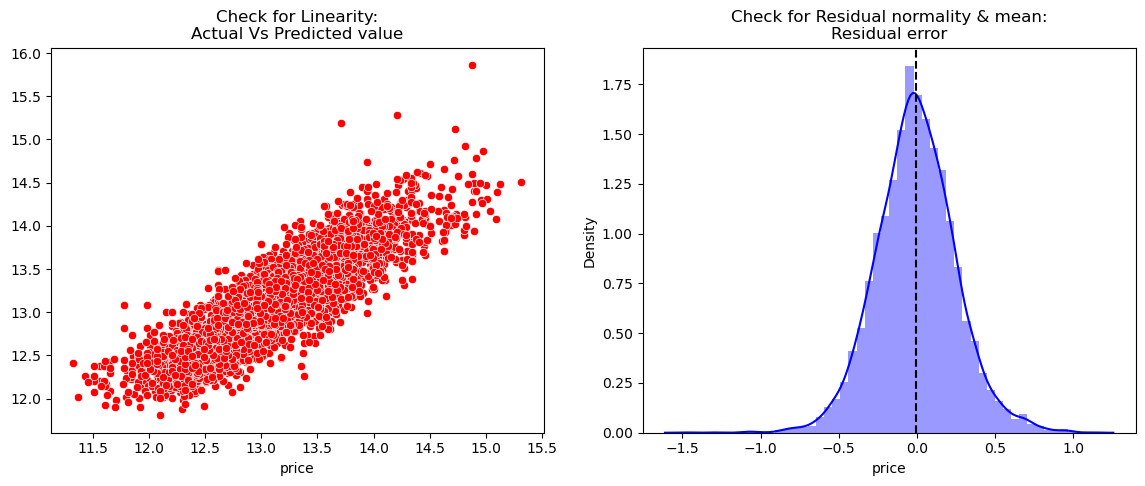

In [57]:
# Check for Linearity
a = plt.figure(figsize=(14, 5))
ax = a.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_sk, ax=ax, color='r')
ax.set_title('Check for Linearity:\nActual Vs Predicted value')

# Check for Residual normality & mean
ax = a.add_subplot(122)
sns.distplot((y_test - y_pred_sk), ax=ax, color='b')
ax.axvline((y_test - y_pred_sk).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean:\nResidual error')

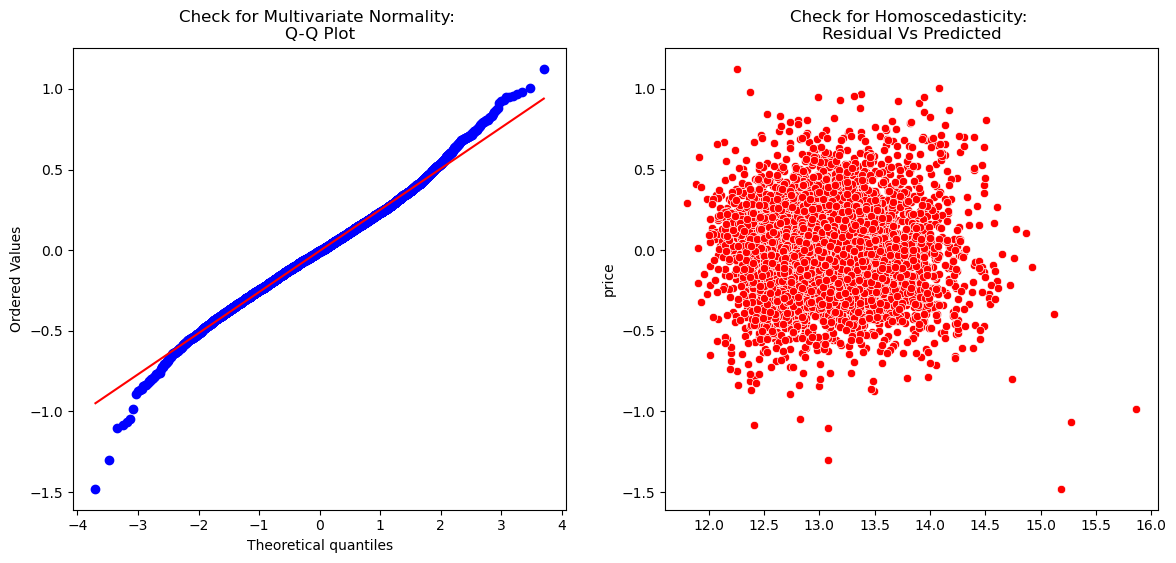

In [58]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
a,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [59]:
VIF = 1/(1- R_square_sk)
VIF

4.1515524239513